In [1]:
from ccDGLevels import np, Catacombs, Caves, Point, Rectangle, Line, Circle
from matplotlib import pyplot as plot
import cv2 as cv

In [2]:
plot.rcParams["figure.figsize"] = (12, 9)

In [3]:
?Catacombs

Init signature:
Catacombs(
    w: int,
    h: int,
    rct: int,
    raap: float,
    varix: int,
    variy: int,
    conn: int,
    doShift: bool,
    padx: int = 0,
    pady: int = 0,
    thick: int = 1,
    varih: int = 0,
)
Docstring:      Nethack style dungeon
File:           ~/Desktop/ccDunGen/ccDGLevels.py
Type:           type
Subclasses:     


In [4]:
myCatacombs = Catacombs(320, 200, 24, 0.012, 10, 7, 3, True, 9, 9, 3, 2)
myCatacombs

A 320 wide by 200 tall dungeon,
with 24 rooms of about 01% average area each,
or of average dimension 35 wide by 21 tall,
with an average of 3 hallways out of each room;
Rooms are padded by at least 9 East-West & 9 North-South,
and have a length variance of +/-10 wide and +/- 7 tall.

In [5]:
%%time
myCatacombs.genRooms(True)

[ 6 -4] (41, 17) (241, 153)
A   41 by   17 Rectangle cornered at ( 241,  153).
A   59 by   35 Rectangle cornered at ( 232,  144).

[-3 -1] (32, 20) (62, 92)
A   32 by   20 Rectangle cornered at (  62,   92).
A   50 by   38 Rectangle cornered at (  53,   83).

[-4  3] (31, 24) (188, 37)
A   31 by   24 Rectangle cornered at ( 188,   37).
A   49 by   42 Rectangle cornered at ( 179,   28).

[ 6 -1] (41, 20) (276, 9)
A   41 by   20 Rectangle cornered at ( 276,    9).
A   59 by   38 Rectangle cornered at ( 267,    0).

[-7 -7] (28, 14) (21, 97)
A   28 by   14 Rectangle cornered at (  21,   97).
A   46 by   32 Rectangle cornered at (  12,   88).

[-8  1] (27, 22) (159, 98)
A   27 by   22 Rectangle cornered at ( 159,   98).
A   45 by   40 Rectangle cornered at ( 150,   89).

[-9  6] (26, 27) (198, 75)
A   26 by   27 Rectangle cornered at ( 198,   75).
A   44 by   45 Rectangle cornered at ( 189,   66).

[ 6 -6] (41, 15) (162, 171)
A   41 by   15 Rectangle cornered at ( 162,  171).
A   59 by   3

In [6]:
%%time
myCatacombs.genHalls(True)

CPU times: user 50.1 ms, sys: 1.9 ms, total: 52 ms
Wall time: 52.4 ms


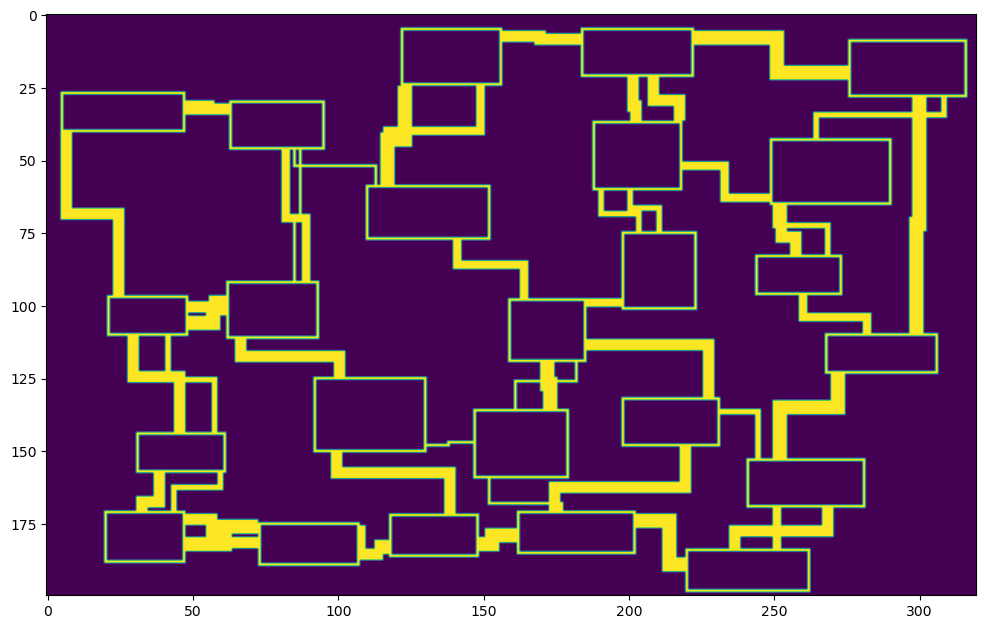

In [7]:
plot.imshow(myCatacombs.draw())
plot.show()

In [8]:
myCatacombs.getImageData()

{'floorRooms': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        ...,
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _]]),
 'floorHalls': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        ...,
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _]]),
 'walls': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        ...,
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _]]),
 'doors': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        ...,
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _]]),
 'all': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, 

floorRooms


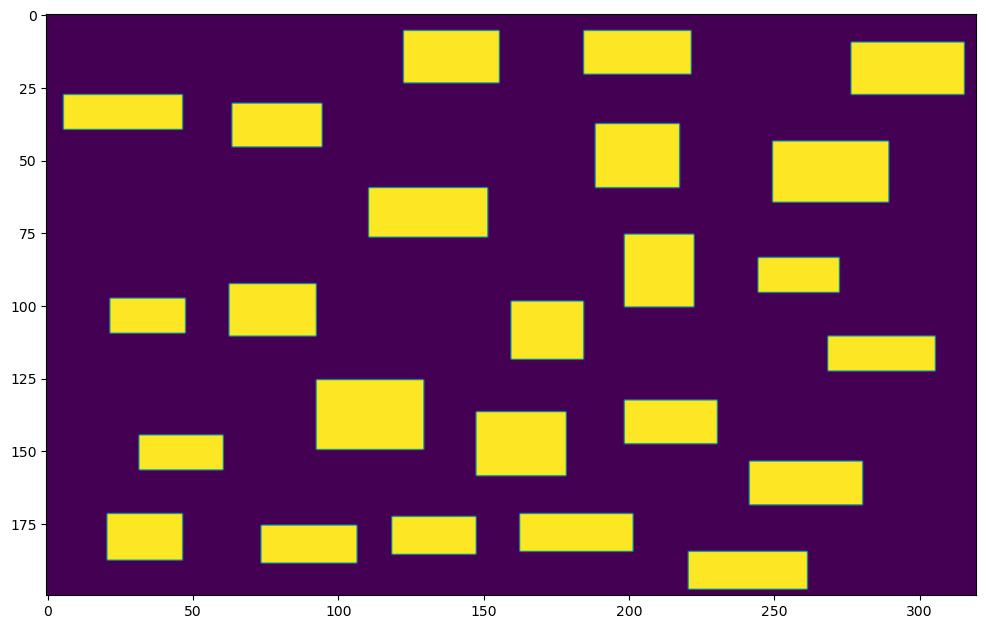

floorHalls


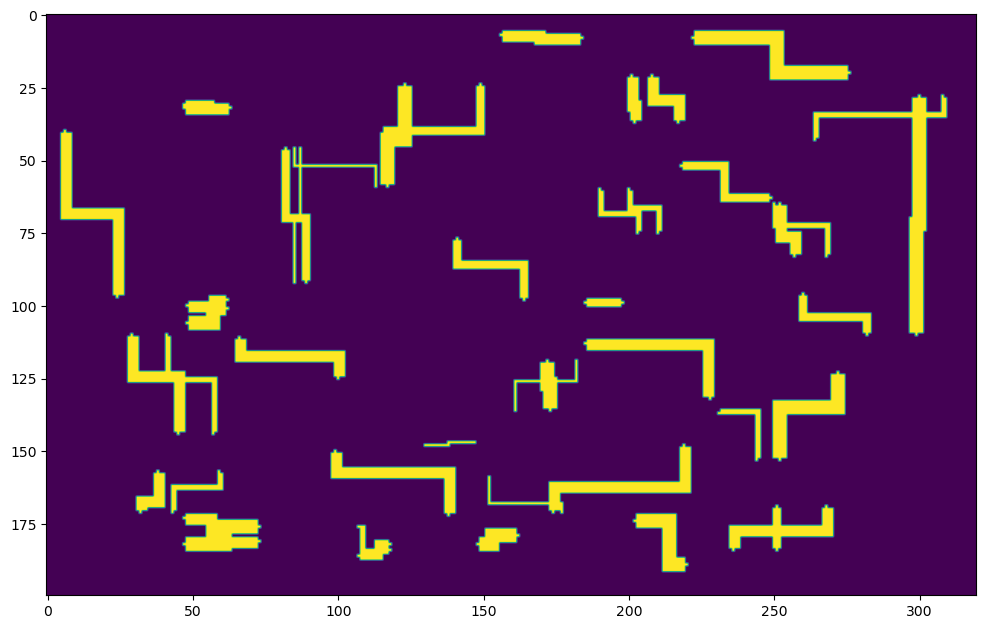

walls


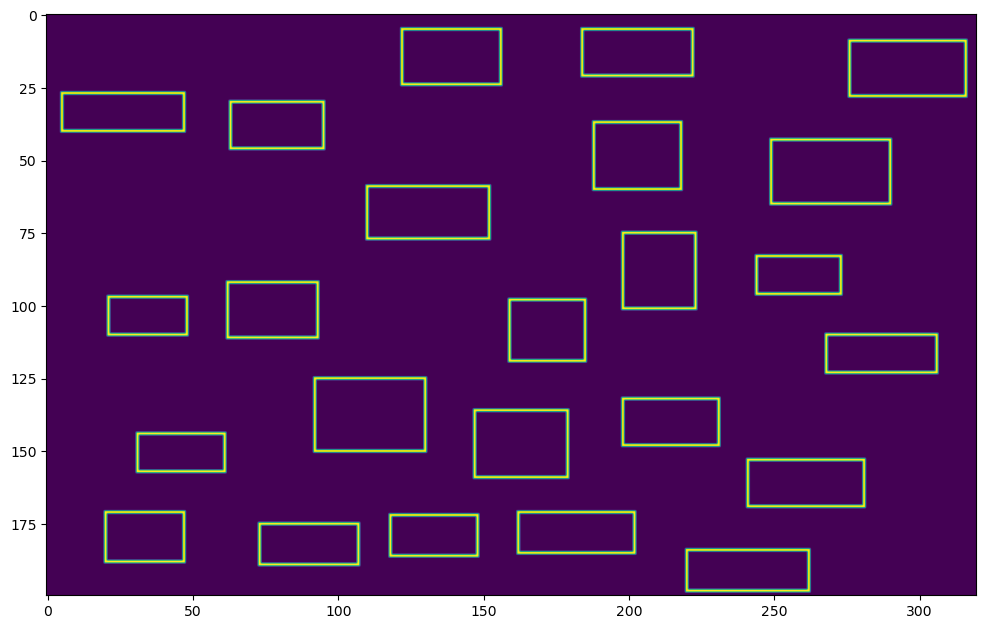

doors


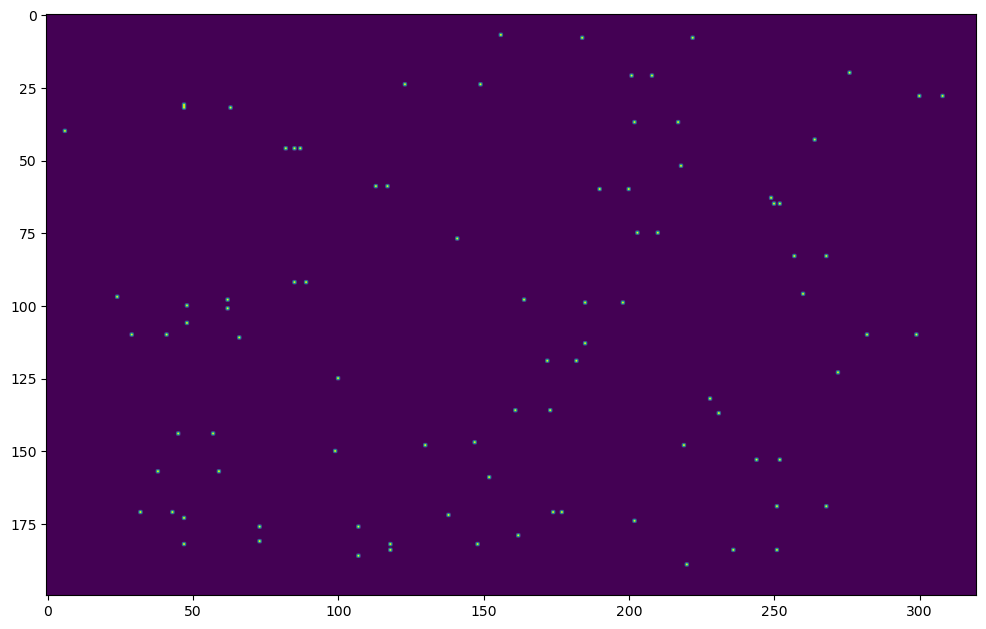

all


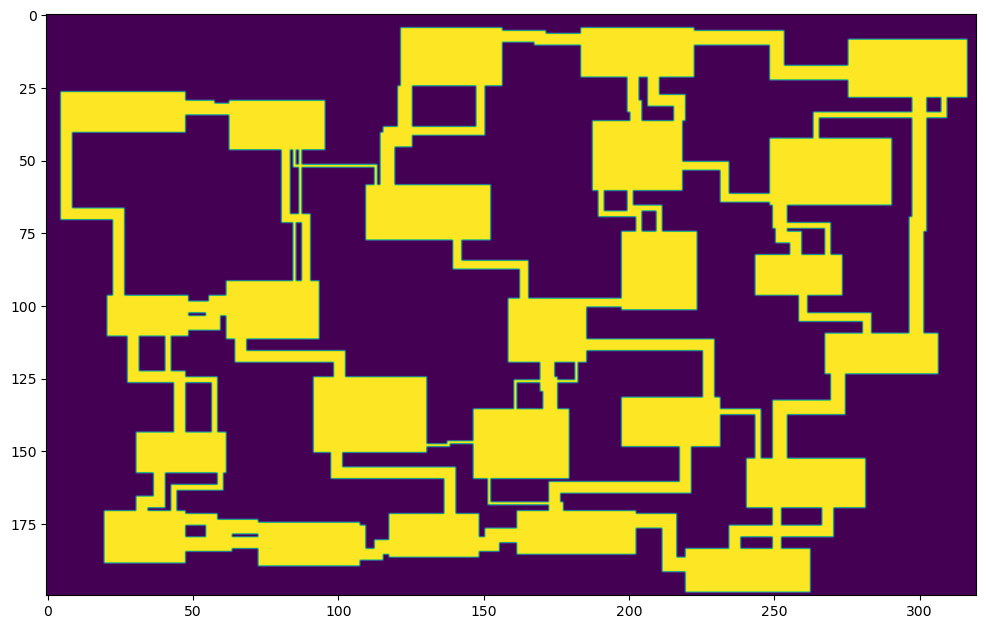

dungeonType


In [9]:
layers = myCatacombs.getImageData()
for k in layers.keys():
    print(k)
    if type(layers[k]) is str:
        continue
    plot.imshow(layers[k])
    plot.show()

In [10]:
imageScale = Point(16, 16)
imageSize = myCatacombs.size * imageScale.npar
imageSize

(5120, 3200)

In [11]:
myCatacombsImage = np.zeros((imageSize.y, imageSize.x, 3), np.uint8)
myCatacombsImage.shape

(3200, 5120, 3)

In [12]:
BROWN = np.array([0x64, 0x40, 0x20], np.uint8)
NAVY = np.array([0x14, 0x28, 0x48], np.uint8)
BLUE = np.array([0x40, 0x80, 0xC0], np.uint8)
CYAN = np.array([0x40, 0xFF, 0xFF], np.uint8)
BLUE, BROWN, CYAN, NAVY

(array([ 64, 128, 192], dtype=uint8),
 array([100,  64,  32], dtype=uint8),
 array([ 64, 255, 255], dtype=uint8),
 array([20, 40, 72], dtype=uint8))

In [13]:
floorsY, floorsX = np.where(layers["floorRooms"])
floorsY *= imageScale.y
floorsX *= imageScale.x
floorsY, floorsX

(array([  96,   96,   96, ..., 3152, 3152, 3152]),
 array([1968, 1984, 2000, ..., 4144, 4160, 4176]))

In [14]:
np.tile(NAVY, 5).reshape(5, -1)

array([[20, 40, 72],
       [20, 40, 72],
       [20, 40, 72],
       [20, 40, 72],
       [20, 40, 72]], dtype=uint8)

In [15]:
np.tile(_, 5).reshape(5, 5, -1)

array([[[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]],

       [[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]],

       [[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]],

       [[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]],

       [[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]]], dtype=uint8)

In [16]:
_.shape

(5, 5, 3)

In [17]:
np.random.randint(-16, 17, (2, 2, 3))

array([[[-16, -11,  -3],
        [ 14,   0,   1]],

       [[ 10, -16,  -9],
        [ -2,  15,  -7]]])

In [18]:
_ + NAVY

array([[[ 4, 29, 69],
        [34, 40, 73]],

       [[30, 24, 63],
        [18, 55, 65]]])

CPU times: user 343 ms, sys: 12.7 ms, total: 356 ms
Wall time: 355 ms


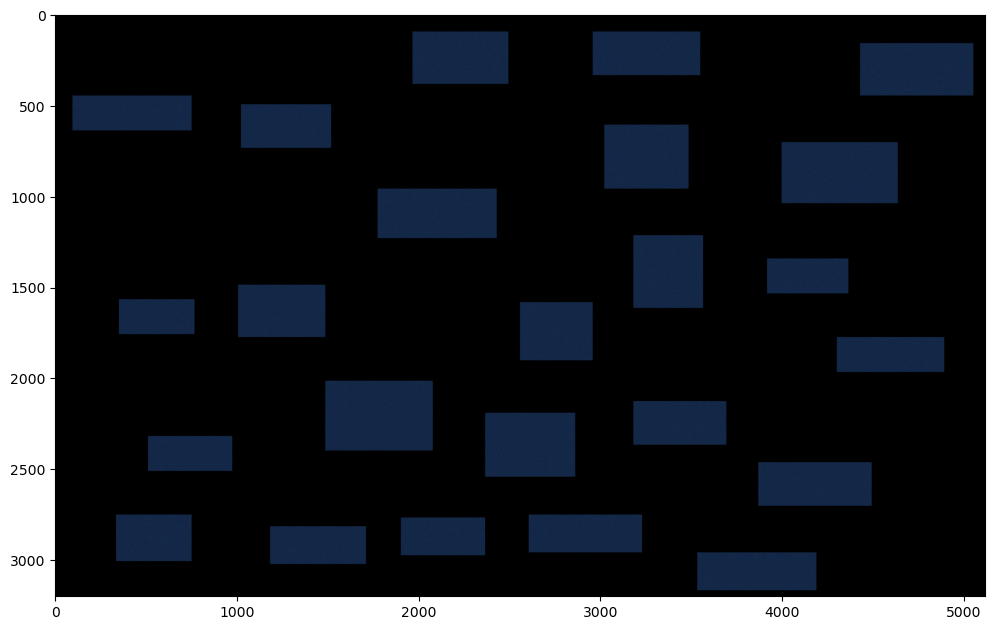

In [19]:
%%time
for i in range(len(floorsY)):
    myCatacombsImage[floorsY[i]:floorsY[i] + imageScale.y, floorsX[i]:floorsX[i] + imageScale.x] = np.random.randint(-16, 17, (imageScale.y, imageScale.x, 3)) + NAVY
plot.imshow(myCatacombsImage)

In [20]:
A = np.arange(4).reshape(2, 2)
A

array([[0, 1],
       [2, 3]])

In [21]:
A.repeat(4, 0)

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3]])

In [22]:
A.repeat(4, 1)

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3]])

In [23]:
A.repeat(4, 0).repeat(4, 1)

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3]])

In [24]:
A.repeat(4, 1).repeat(4, 0)

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3]])

In [25]:
A.repeat(2, 0).repeat(4, 1)

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3]])

In [26]:
myCatacombsImage = np.zeros((imageSize.y, imageSize.x, 3), np.uint8)
myCatacombsImage.shape

(3200, 5120, 3)

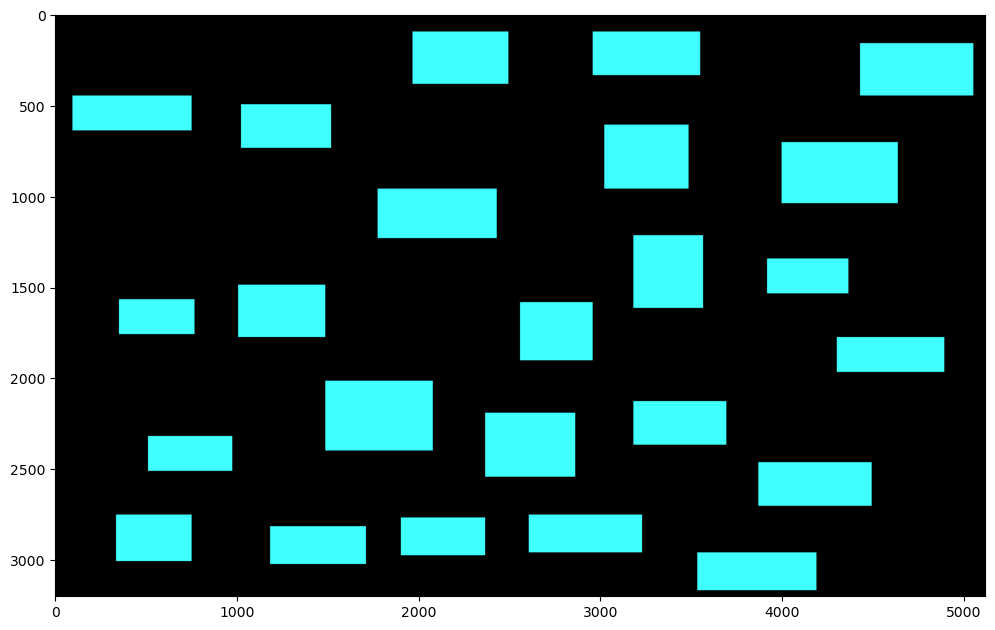

CPU times: user 1.22 s, sys: 72.5 ms, total: 1.29 s
Wall time: 1.29 s


In [27]:
%%time
myCatacombsImage[np.where(layers["floorRooms"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))] = CYAN
plot.imshow(myCatacombsImage)
plot.show()

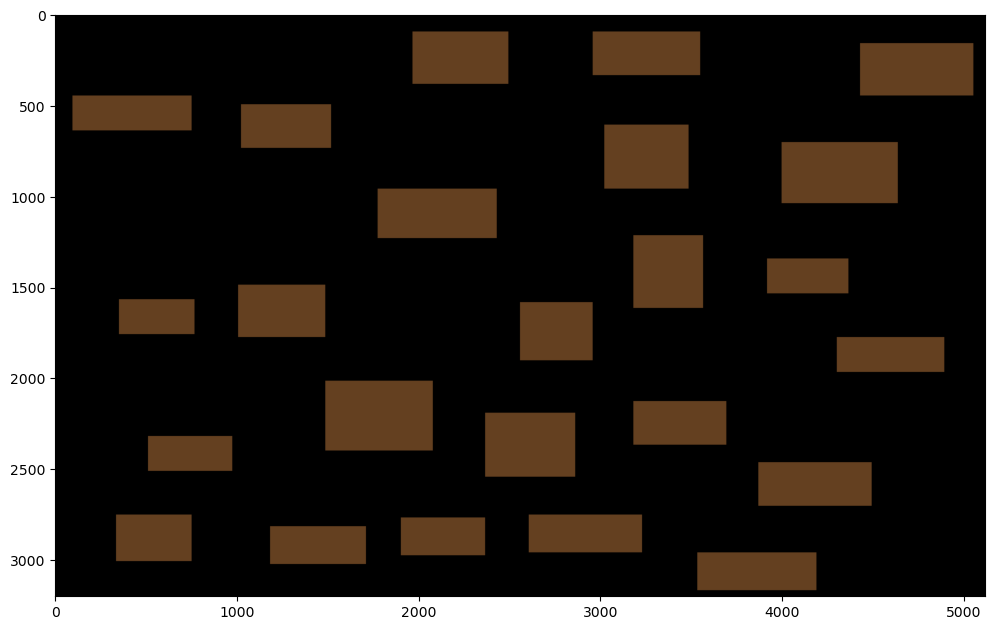

In [28]:
myCatacombsImage[np.where(layers["floorRooms"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))] = BROWN
plot.imshow(myCatacombsImage)
plot.show()

In [29]:
%%time
indexHall = np.where(layers["floorHalls"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))
indexFloor = np.where(layers["floorRooms"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))
indexWall = np.where(layers["walls"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))
indexDoor = np.where(layers["doors"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))

myCatacombsImage[indexHall] = np.random.randint(-16, 17, (indexHall[0].shape[0], 3)) + BROWN
myCatacombsImage[indexFloor] = np.random.randint(-16, 17, (indexFloor[0].shape[0], 3)) + BLUE
myCatacombsImage[indexWall] = np.random.randint(-16, 17, (indexWall[0].shape[0], 3)) + NAVY
myCatacombsImage[indexDoor] = np.random.randint(-32, 1, (indexDoor[0].shape[0], 3)) + CYAN

CPU times: user 662 ms, sys: 39.6 ms, total: 702 ms
Wall time: 702 ms


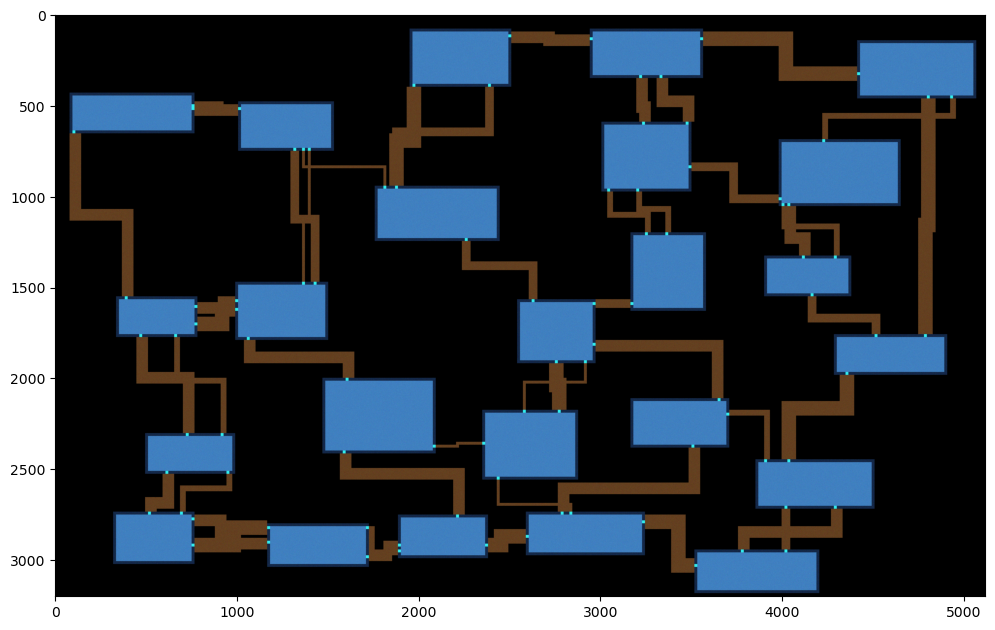

CPU times: user 1.17 s, sys: 45.5 ms, total: 1.22 s
Wall time: 1.22 s


In [30]:
%%time
plot.imshow(myCatacombsImage)
plot.show()

In [31]:
[np.where(layers[k].repeat(imageScale.y, 0).repeat(imageScale.x, 1))[0].shape[0] if k != "dungeonType" else 0 for k in layers.keys()]

[3317760, 1403904, 633856, 23040, 5332480, 0]

In [32]:
Y, X = np.where(layers["walls"].repeat(16, 0).repeat(16, 1))
Y[:512], X[:512]

(array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
        80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
        80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
        80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
        80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
        80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
        80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
        80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 

In [33]:
%%time
hallsY, hallsX = np.where(layers["floorHalls"])
floorsY, floorsX = np.where(layers["floorRooms"])
wallsY, wallsX = np.where(layers["walls"])
doorsY, doorsX = np.where(layers["doors"])

hallsY *= imageScale.y
hallsX *= imageScale.x
floorsY *= imageScale.y
floorsX *= imageScale.x
wallsY *= imageScale.y
wallsX *= imageScale.x
doorsY *= imageScale.y
doorsX *= imageScale.x

[len(t) for t in (hallsY, floorsY, wallsY, doorsY)]

CPU times: user 1.6 ms, sys: 868 µs, total: 2.47 ms
Wall time: 1.52 ms


[5484, 12960, 2476, 90]

In [34]:
%%time
for i in range(len(hallsY)):
    myCatacombsImage[hallsY[i]:hallsY[i] + imageScale.y, hallsX[i]:hallsX[i] + imageScale.x] = np.random.randint(-16, 17, 3) + BROWN
for i in range(len(floorsY)):
    myCatacombsImage[floorsY[i]:floorsY[i] + imageScale.y, floorsX[i]:floorsX[i] + imageScale.x] = np.random.randint(-16, 17, 3) + BLUE
for i in range(len(wallsY)):
    myCatacombsImage[wallsY[i]:wallsY[i] + imageScale.y, wallsX[i]:wallsX[i] + imageScale.x] = np.random.randint(-16, 17, 3) + NAVY
for i in range(len(doorsY)):
    myCatacombsImage[doorsY[i]:doorsY[i] + imageScale.y, doorsX[i]:doorsX[i] + imageScale.x] = np.random.randint(-32, 1, 3) + CYAN

CPU times: user 200 ms, sys: 2.83 ms, total: 203 ms
Wall time: 203 ms


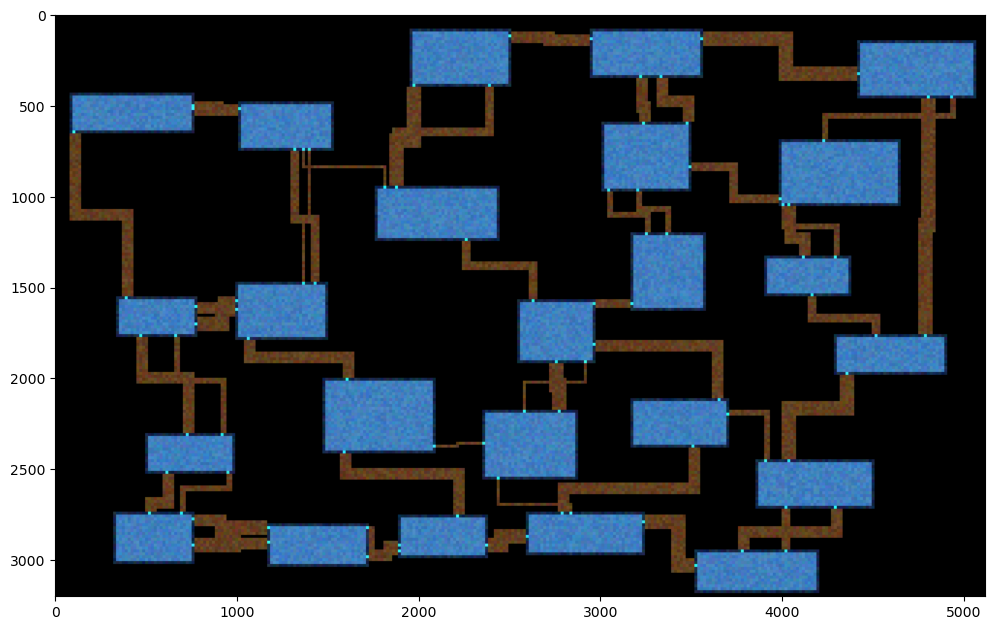

CPU times: user 1.14 s, sys: 24.6 ms, total: 1.17 s
Wall time: 1.17 s


In [35]:
%%time
plot.imshow(myCatacombsImage)
plot.show()

In [36]:
tileSpriteMask = np.ones((16, 16, 3), float)
dirtSpriteMask = np.ones((16, 16, 3), float)
doorSpriteMask = np.ones((16, 16, 3), float)
brickSpriteMask = np.ones((16, 16, 3), float)
#tileSpriteMask

In [37]:
np.arange(16).repeat(16)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 

In [38]:
np.arange(16).repeat(16).reshape(16, -1).transpose().flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 

In [39]:
np.random.randint(0, 16, (2, np.random.randint(24, 49)))

array([[15, 13,  7,  6,  8,  6, 11,  1,  0,  5,  0,  4, 11, 15,  2,  2, 15,  3,  8,  6, 14,  3,  9, 12,  4,  9,  8,  4, 12],
       [ 7,  2,  8, 14,  7, 11,  7,  9,  6, 15,  5,  2,  0, 11, 11,  3,  6,  5,  2, 10, 11,  1,  9,  2, 13, 13, 15,  3,  8]])

In [40]:
tileSpriteMask[np.arange(16), np.arange(16)] = 0.5
tileSpriteMask[np.arange(16), np.arange(15, -1, -1)] = 0.5
tileSpriteMask[np.arange(14) + 1, 1] = 0.75
tileSpriteMask[np.arange(14) + 1, 14] = 0.75
tileSpriteMask[1, np.arange(14) + 1] = 0.75
tileSpriteMask[14, np.arange(14) + 1] = 0.75

dirtSpots = np.random.randint(0, 16, (2, np.random.randint(48, 65)))
dirtSpriteMask[dirtSpots[0], dirtSpots[1]] = 0.5

for i in range(3, 16, 4):
    doorSpriteMask[:, i] = 0.5
for i in range(3, 16, 8):
    doorSpriteMask[i, :] = 0.5
    
for i in np.arange(2, 15, 4) + np.random.randint(-1, 2, 4):
    brickSpriteMask[:, i] = 0.75
for i in np.arange(3, 12, 4) + np.random.randint(-2, 3, 3):
    brickSpriteMask[i, :] = 0.75

tileSpriteMask[:, :, 0], dirtSpriteMask[:, :, 0], doorSpriteMask[:, :, 0], brickSpriteMask[:, :, 0]

(array([[0.5 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 ],
        [1.  , 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.  ],
        [1.  , 0.75, 0.5 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 , 0.75, 1.  ],
        [1.  , 0.75, 1.  , 0.5 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 , 1.  , 0.75, 1.  ],
        [1.  , 0.75, 1.  , 1.  , 0.5 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 , 1.  , 1.  , 0.75, 1.  ],
        [1.  , 0.75, 1.  , 1.  , 1.  , 0.5 , 1.  , 1.  , 1.  , 1.  , 0.5 , 1.  , 1.  , 1.  , 0.75, 1.  ],
        [1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 0.5 , 1.  , 1.  , 0.5 , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  ],
        [1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 , 0.5 , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  ],
        [1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 , 0.5 , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  ],
        [1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 0

In [41]:
np.arange(2, 15, 4) + np.random.randint(-1, 2, 4)

array([ 2,  7, 11, 15])

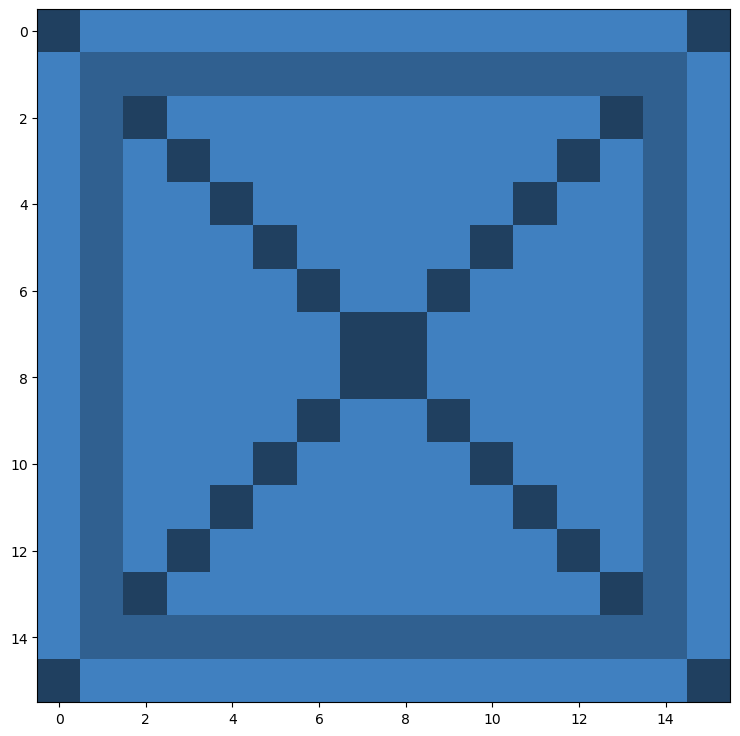

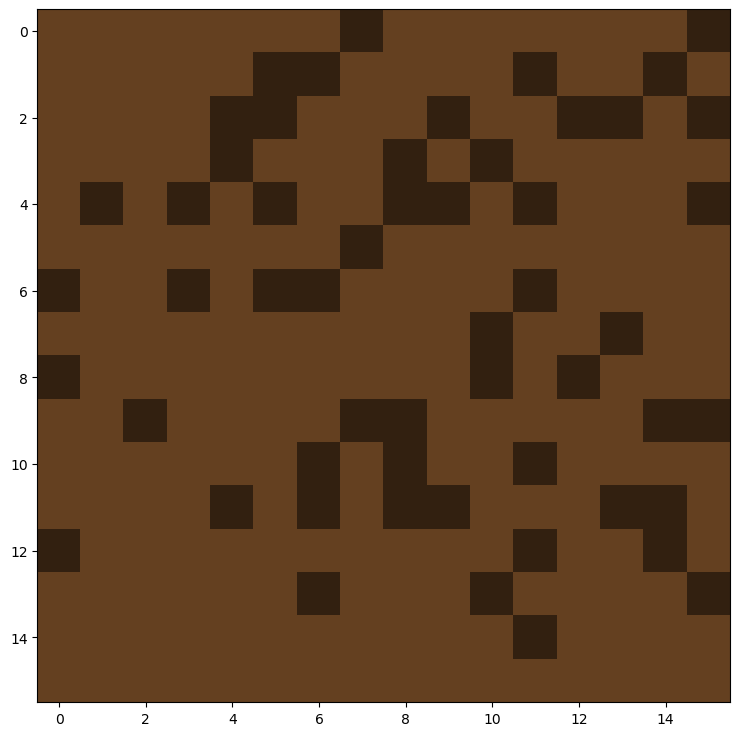

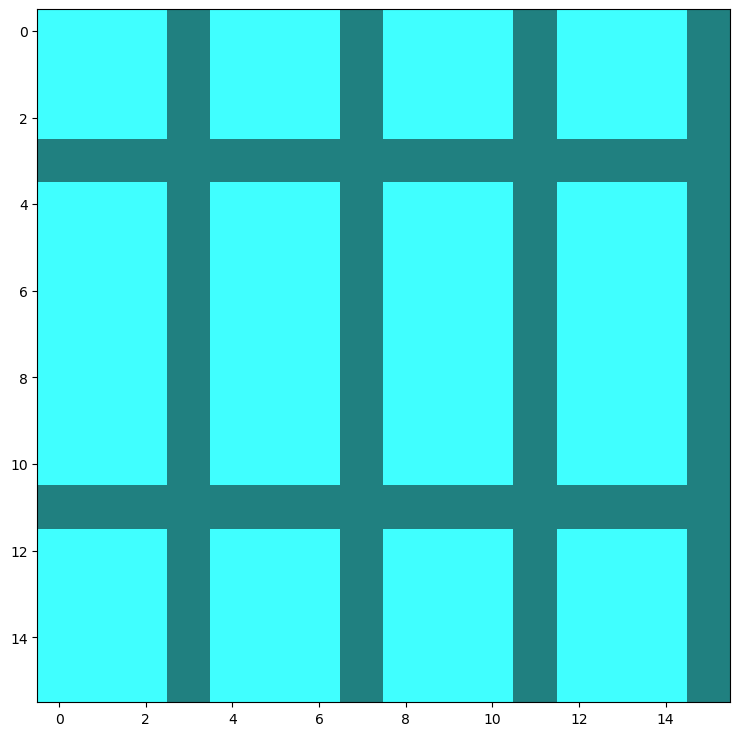

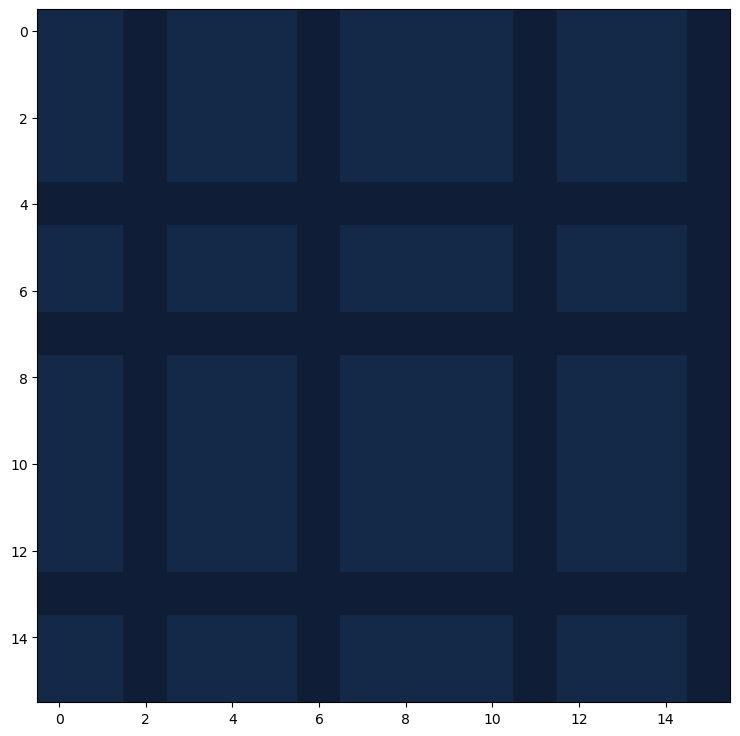

In [42]:
plot.imshow((tileSpriteMask * BLUE).round().astype(np.uint8))
plot.show()

plot.imshow((dirtSpriteMask * BROWN).round().astype(np.uint8))
plot.show()

plot.imshow((doorSpriteMask * CYAN).round().astype(np.uint8))
plot.show()

plot.imshow((brickSpriteMask * NAVY).round().astype(np.uint8))
plot.show()

In [43]:
np.tile((tileSpriteMask * NAVY).round().astype(np.uint8), (3, 1, 1)).shape

(48, 16, 3)

In [44]:
myCatacombs.size

(320, 200)

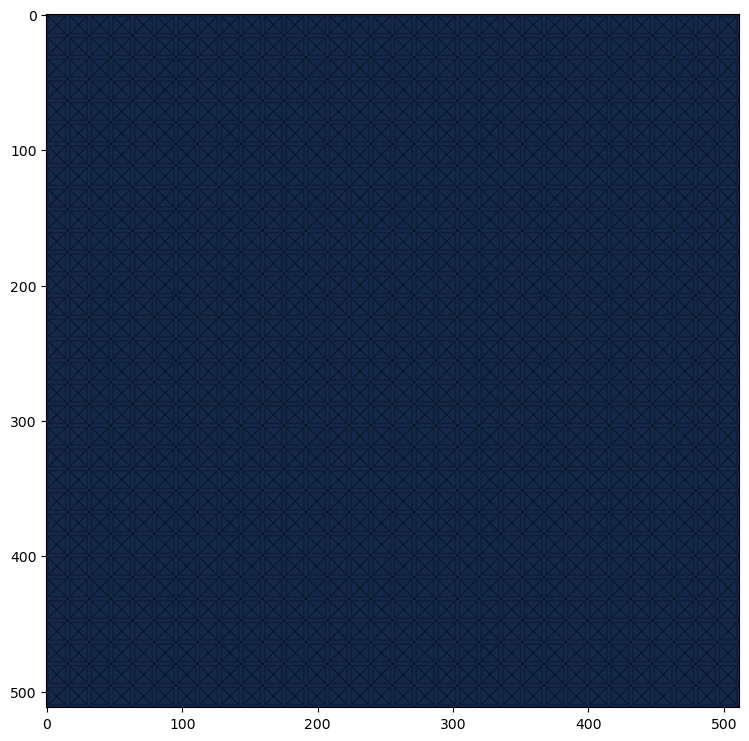

In [45]:
plot.imshow(
    np.tile(
        (
            tileSpriteMask * NAVY
        ).round().astype(np.uint8),
        (myCatacombs.size.y, myCatacombs.size.x, 1)
    )[:512, :512]
)

In [46]:
myCatacombsImage[indexHall] = np.tile(
    (dirtSpriteMask * BROWN).round().astype(np.uint8),
    (myCatacombs.size.y, myCatacombs.size.x, 1)
)[indexHall]

myCatacombsImage[indexFloor] = np.tile(
    (tileSpriteMask * BLUE).round().astype(np.uint8),
    (myCatacombs.size.y, myCatacombs.size.x, 1)
)[indexFloor]

myCatacombsImage[indexWall] = np.tile(
    (brickSpriteMask * NAVY).round().astype(np.uint8),
    (myCatacombs.size.y, myCatacombs.size.x, 1)
)[indexWall]

myCatacombsImage[indexDoor] = np.tile(
    (doorSpriteMask * CYAN).round().astype(np.uint8),
    (myCatacombs.size.y, myCatacombs.size.x, 1)
)[indexDoor]

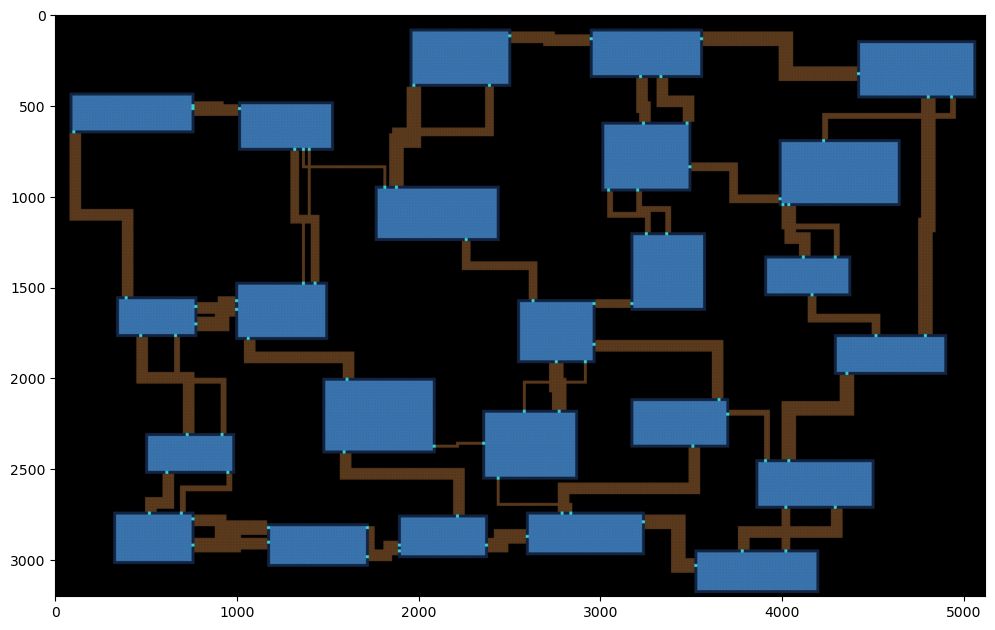

In [47]:
plot.imshow(myCatacombsImage)
plot.show()

In [48]:
cv.imwrite("tileTestRGB.png", myCatacombsImage)
cv.imwrite("tileTestBGR.png", myCatacombsImage[:, :, ::-1])

True

In [49]:
?Caves

Init signature:
Caves(
    w: int,
    h: int,
    rct: int,
    raap: float,
    carvep: float,
    carven: int,
    carveq: int,
    carver: int,
    vari: int,
    conn: int,
    pad: int = 0,
    thick: int = 1,
    varihr: int = 0,
    variha: float = 0.0,
)
Docstring:      Circle-based caves and tunnels
File:           ~/Desktop/ccDunGen/ccDGLevels.py
Type:           type
Subclasses:     


In [50]:
myCave = Caves(80, 24, 3, 0.08, 0.5, 6, 2.5, 2, 3, 2, 7, 3, 1, 30.0)
myCave

A 80 wide by 24 tall cave network,
with 3 chambers of about 08% average area each,
or of average radius 7, with an average of 2 tunnels
out of each chamber; Each chamber is carved 6 times
with a 50% chance of filling in,
with circles of average radius 3 +/- 2;
Rooms are padded by at least 7 radial cells,
and have a radius variance of +/- 3.

In [51]:
%%time
myCave.genRooms(True)
myCave.genCarves(True)

3 10 (43, 11)
A radius   10 circle centered at (43, 11).

-3 4 (66, 9)
A radius    4 circle centered at (66, 9).

-3 4 (17, 5)
A radius    4 circle centered at (17, 5).

Attemped room generation 11 times.
Carve Ratio: 0.136418522650196
Generated 6 carves with 15 attempts for room A radius   10 circle centered at (43, 11).
Generated 5 carves with 192 attempts for room A radius    4 circle centered at (66, 9).
Generated 4 carves with 192 attempts for room A radius    4 circle centered at (17, 5).
CPU times: user 334 ms, sys: 4.96 ms, total: 339 ms
Wall time: 337 ms


In [52]:
%%time
myCave.genHalls(True)

Digging tunnels to room A radius   10 circle centered at (43, 11).
Generated a hall from A radius    4 circle centered at (66, 9).
Generated a hall from A radius    4 circle centered at (17, 5).
Digging tunnels to room A radius    4 circle centered at (66, 9).
Generated a hall from A radius   10 circle centered at (43, 11).
Digging tunnels to room A radius    4 circle centered at (17, 5).
Generated a hall from A radius   10 circle centered at (43, 11).
CPU times: user 17.2 ms, sys: 5.84 ms, total: 23 ms
Wall time: 19.2 ms


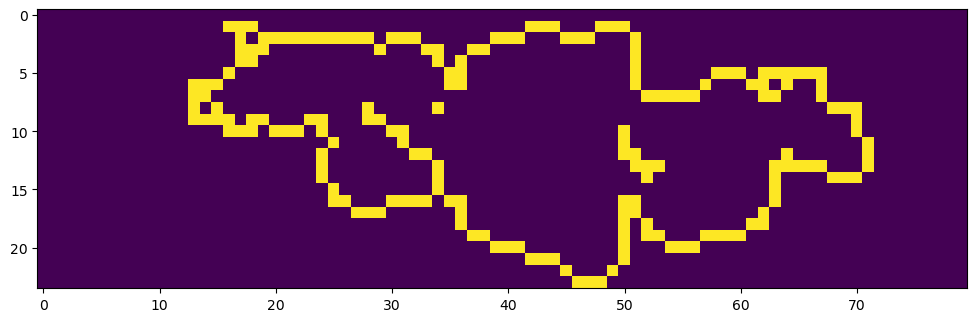

In [53]:
plot.imshow(myCave.draw())#.repeat(2, 0))
plot.show()

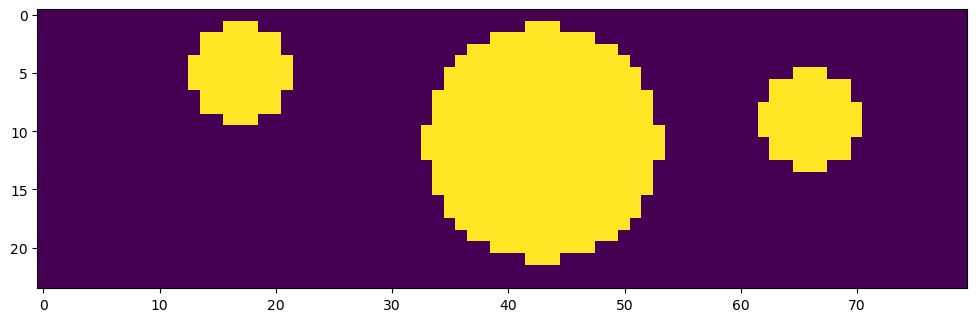

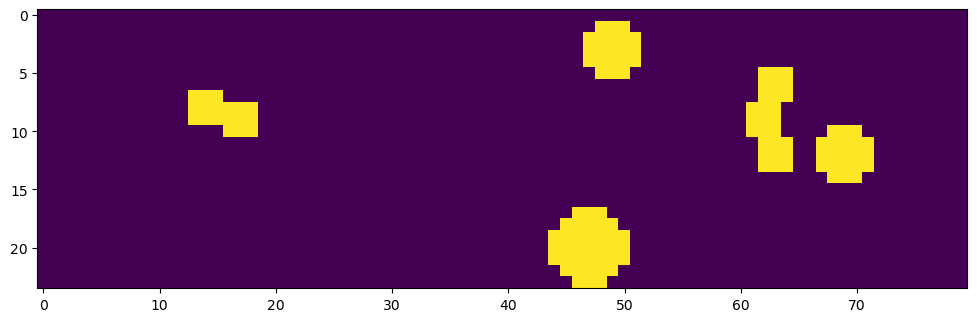

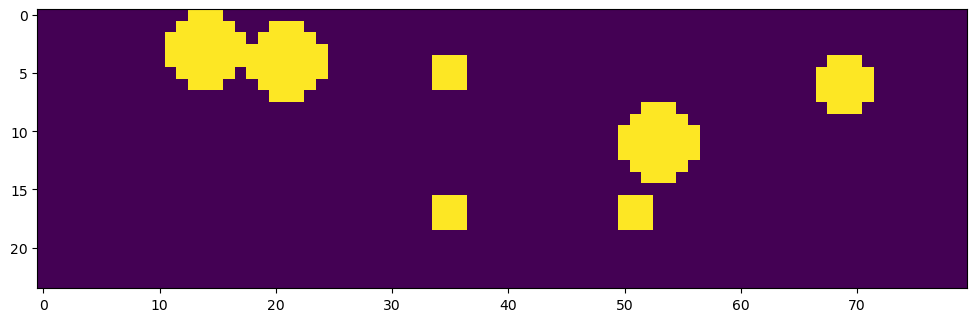

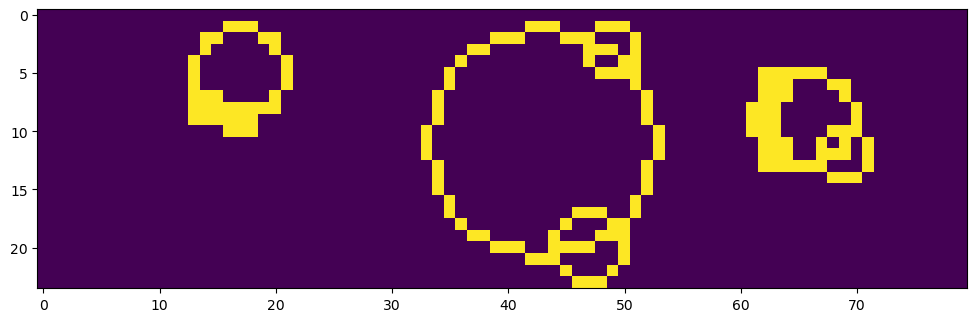

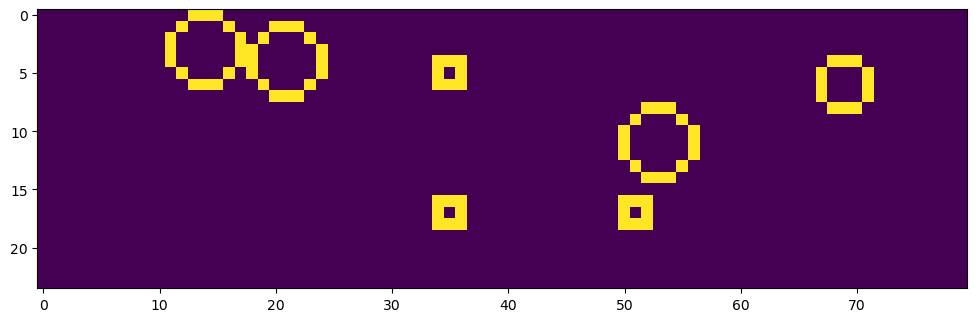

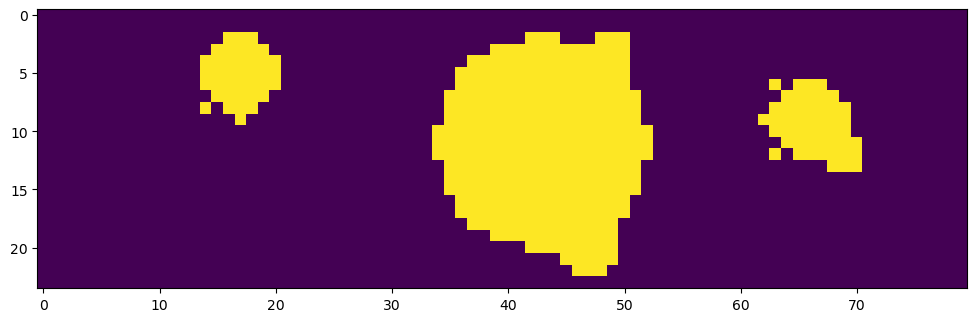

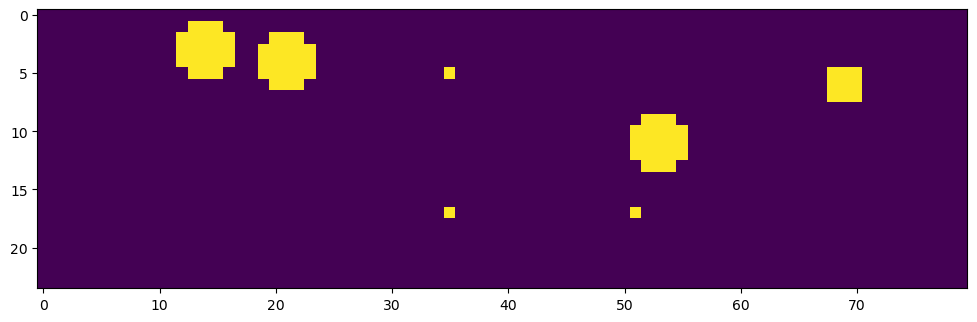

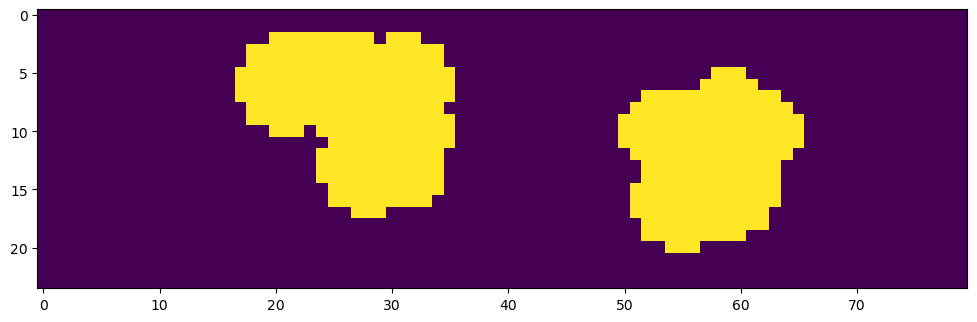

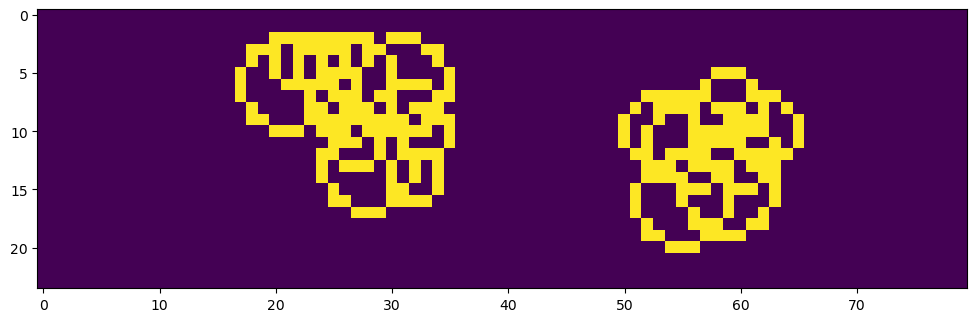

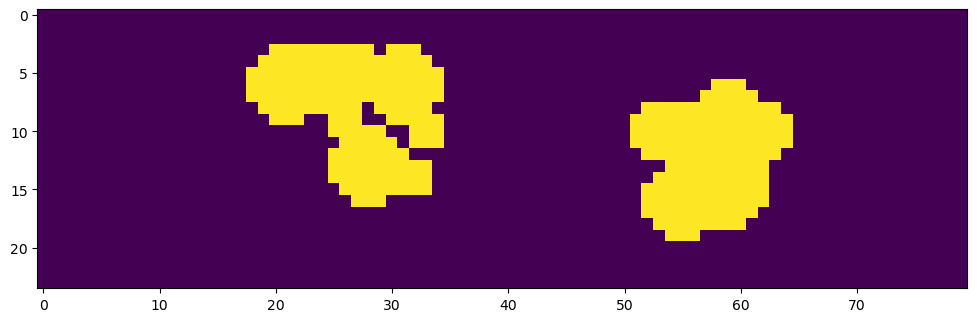

In [54]:
layers = myCave.draw("layers")
for l in layers:
    plot.imshow(l)#.repeat(2, 0))
    plot.show()

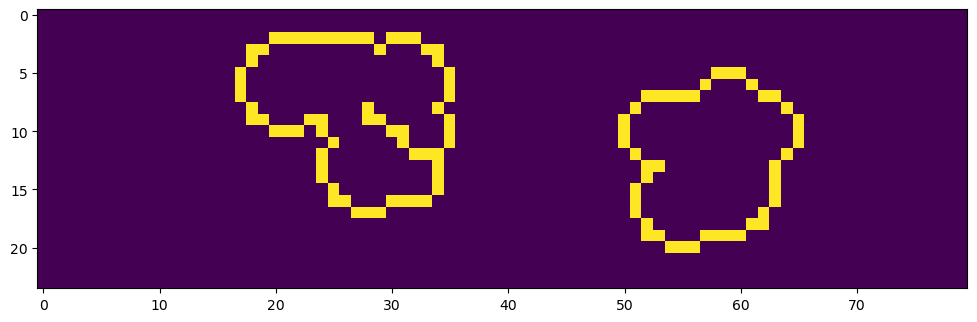

In [55]:
plot.imshow(layers[8] & ~layers[9])

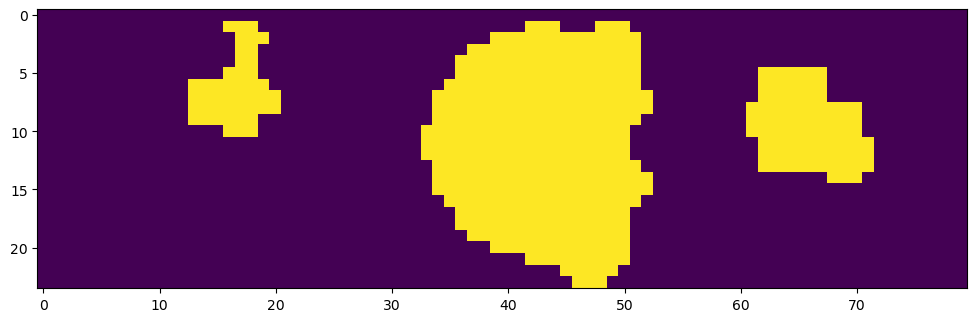

In [56]:
plot.imshow((layers[0] | layers[1]) & ~layers[6])

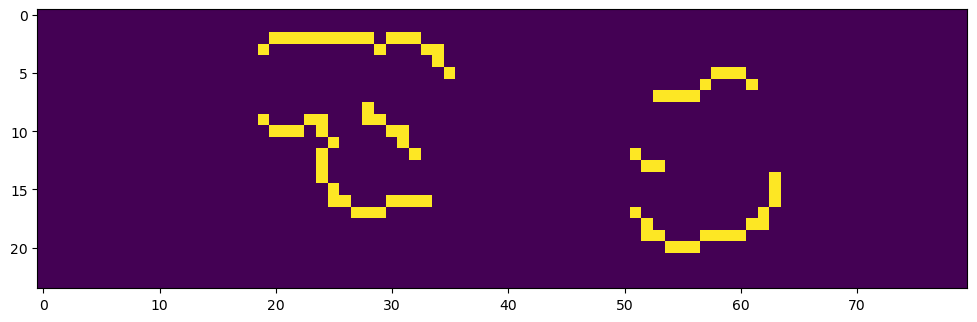

In [57]:
plot.imshow( (layers[8] & ~layers[9]) & ~( ( layers[0] | layers[1] ) & ~layers[6] ) )

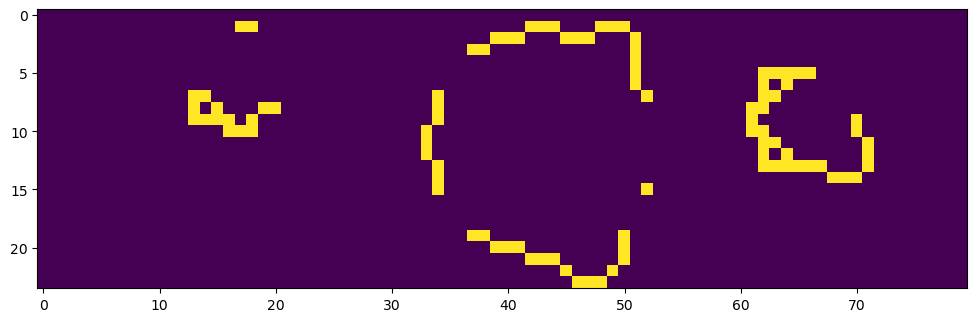

In [58]:
plot.imshow((layers[3] & ~layers[5]) & ~layers[2])

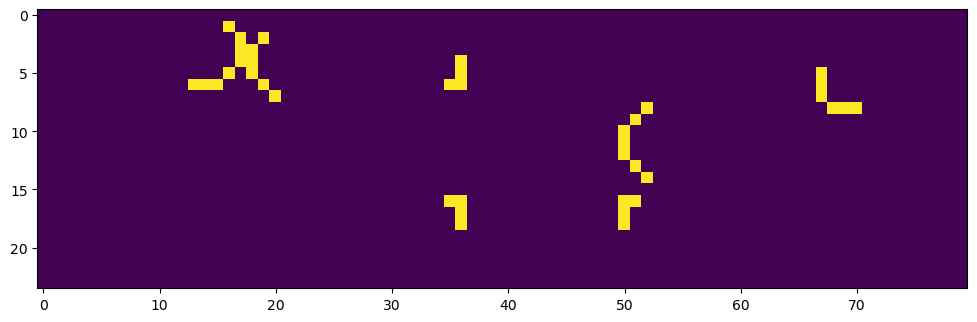

In [59]:
plot.imshow(layers[4] & layers[0])

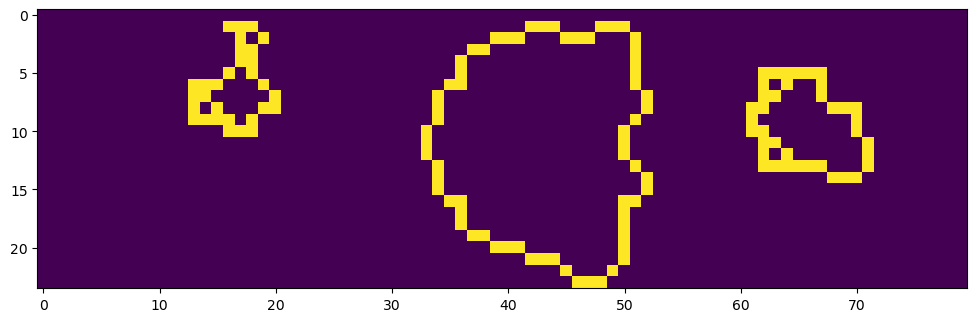

In [60]:
plot.imshow(((layers[3] & ~layers[5]) & ~layers[2]) | (layers[4] & layers[0]))

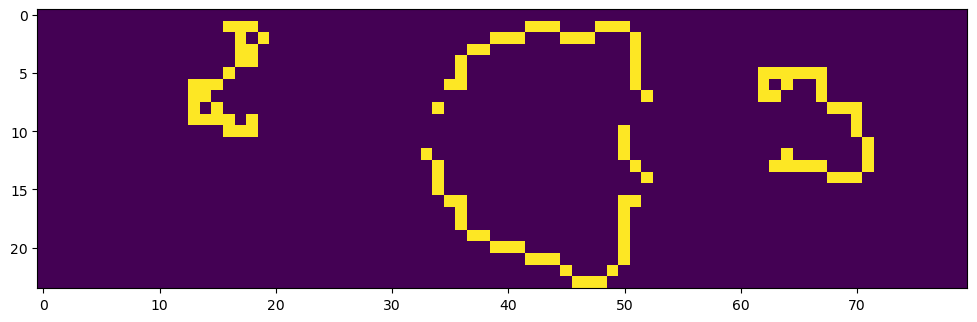

In [61]:
plot.imshow((((layers[3] & ~layers[5]) & ~layers[2]) | (layers[4] & layers[0])) & ~layers[9])

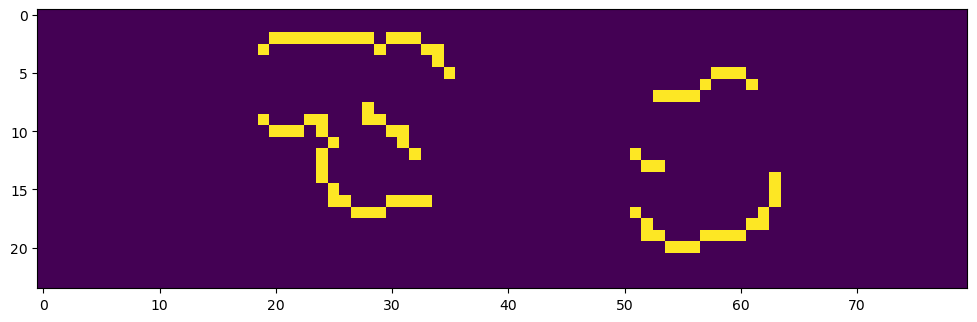

In [62]:
plot.imshow( (layers[8] & ~layers[9]) & ~( ( layers[0] | layers[1] ) & ~layers[6] ) )

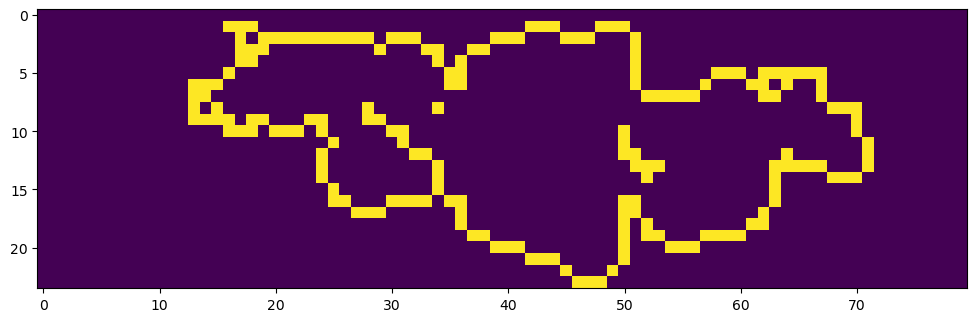

In [63]:
plot.imshow(
    (
        (
            (
                (
                    layers[3] & ~layers[5]
                ) & ~layers[2]
            ) | (
                layers[4] & layers[0]
            )
        ) & ~layers[9]
    ) | (
        layers[8] & ~layers[9]
    ) & ~(
        (
            layers[0] | layers[1]
        ) & ~layers[6]
    )
)

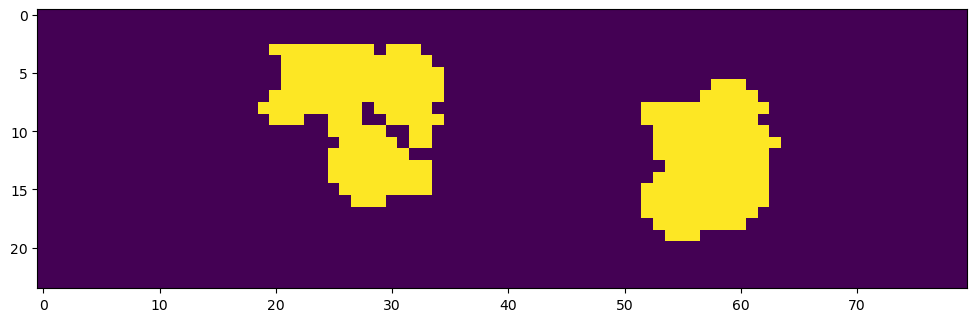

In [64]:
plot.imshow(layers[9] & ~layers[5])

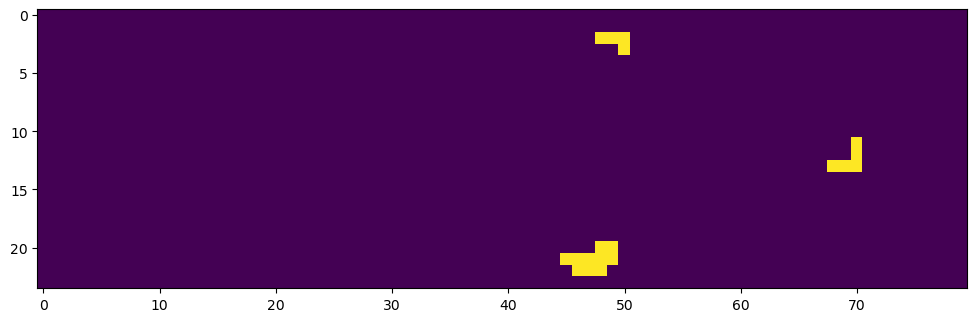

In [65]:
plot.imshow(layers[1] & layers[5] & ~layers[0])